In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
%matplotlib inline
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


# LOADING THE DATASET


In [6]:
df=pd.read_csv("C:\\Users\\vish\\Desktop\\online_shoppers_intention.csv")

In [7]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [8]:
#data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
#Analysing the dataset statistically
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# DATA PREPROCESSING


# Checking for null Values

In [10]:
df.isnull().any()

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool

In [11]:
#there is no null values seen 
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [12]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [13]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [14]:
# Identify duplicate columns
duplicate_cols = df.columns.duplicated()

# Drop duplicate columns
df = df.loc[:, ~duplicate_cols]
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Visualizing and analyzing data



# Univariate Analysis

C:\Users\vish\AppData\Local\Temp\ipykernel_17216\58415897.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BounceRates'])


Text(0.5, 1.0, 'Distribution plot')

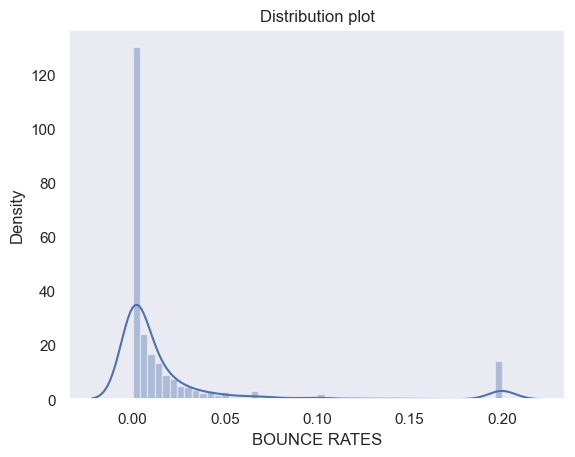

In [15]:
#1.sns distribution plot
sns.set(style="dark")
sns.distplot(df['BounceRates'])
plt.xlabel('BOUNCE RATES')
plt.title('Distribution plot')

['Returning_Visitor' 'New_Visitor' 'Other']


([<matplotlib.patches.Wedge at 0x20eaff1f730>,
 [Text(-0.9889190739305227, 0.481704333815254, 'Returning_Visitor'),
  Text(0.978255552488044, -0.5030070317861491, 'New_Visitor'),
  Text(1.099742039534667, -0.023821135156215947, 'Other')],
 [Text(-0.5394104039621033, 0.262747818444684, '85.57%'),
  Text(0.5335939377207511, -0.27436747188335403, '13.74%'),
  Text(0.5998592942916365, -0.01299334644884506, '0.69%')])

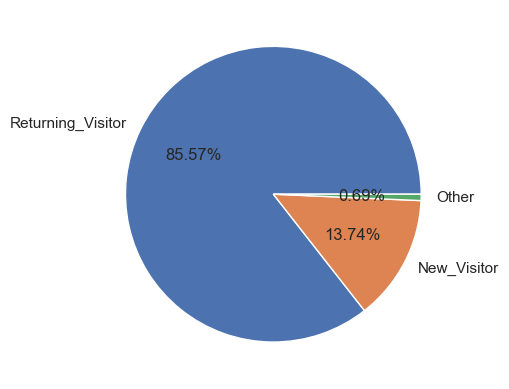

In [16]:
#2.pie plot
visitor_types = df['VisitorType'].unique()
# Print the unique visitor types
print(visitor_types)
plt.pie(df['VisitorType'].value_counts(),labels=visitor_types,autopct="%.2f%%")

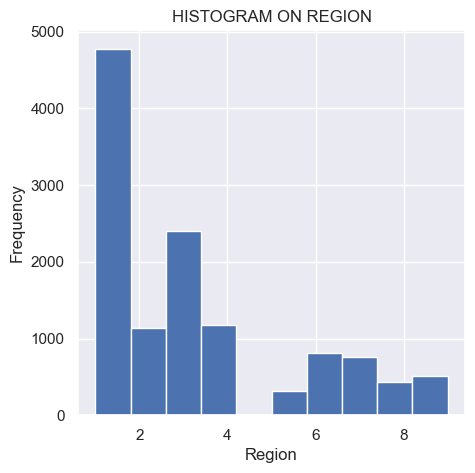

In [17]:
#3.histogram
df['Region'].hist(figsize=(5,5))
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('HISTOGRAM ON REGION')
plt.show()

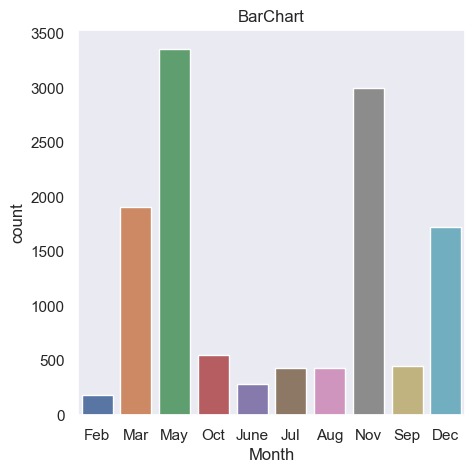

In [18]:
#4.barchat using single variable 
plt.figure(figsize=(5, 5))
sns.countplot(x='Month', data=df)
plt.title('BarChart')
plt.show()

# Bivariate Analysis


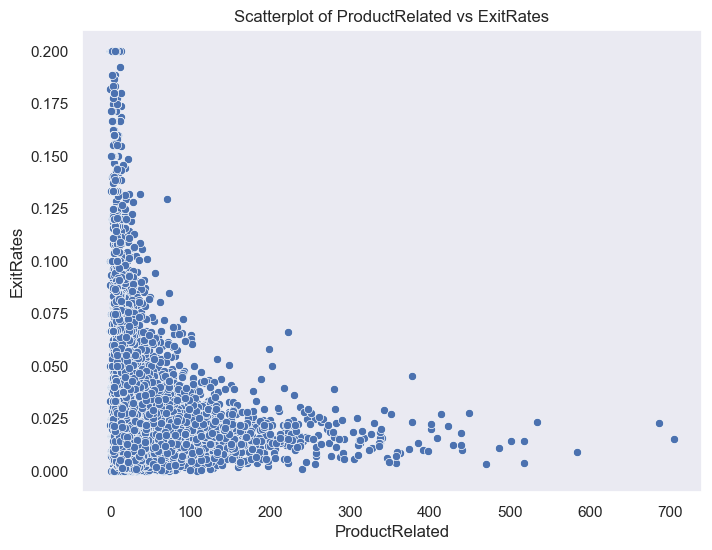

In [19]:
#1.Scatter plot 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ProductRelated', y='ExitRates', data=df)
plt.title('Scatterplot of ProductRelated vs ExitRates')
plt.show()

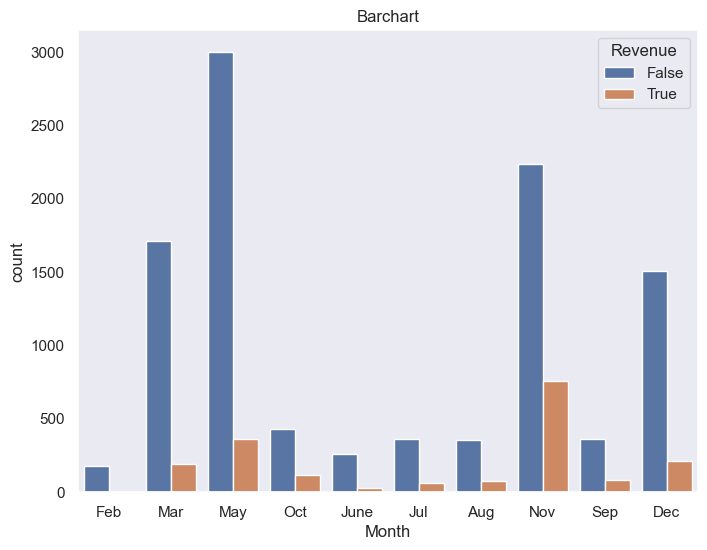

In [20]:
#2.barchart 
plt.figure(figsize=(8, 6))
sns.countplot(x='Month',hue='Revenue', data=df)
plt.title('Barchart')
plt.show()

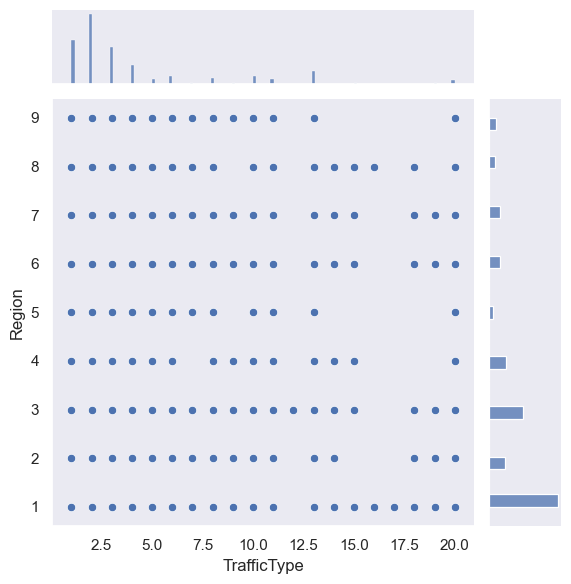

In [21]:
#3.jointplot
sns.jointplot(data=df,x='TrafficType',y='Region')

# Multivariate Analysis

C:\Users\vish\AppData\Local\Temp\ipykernel_17216\3443735540.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


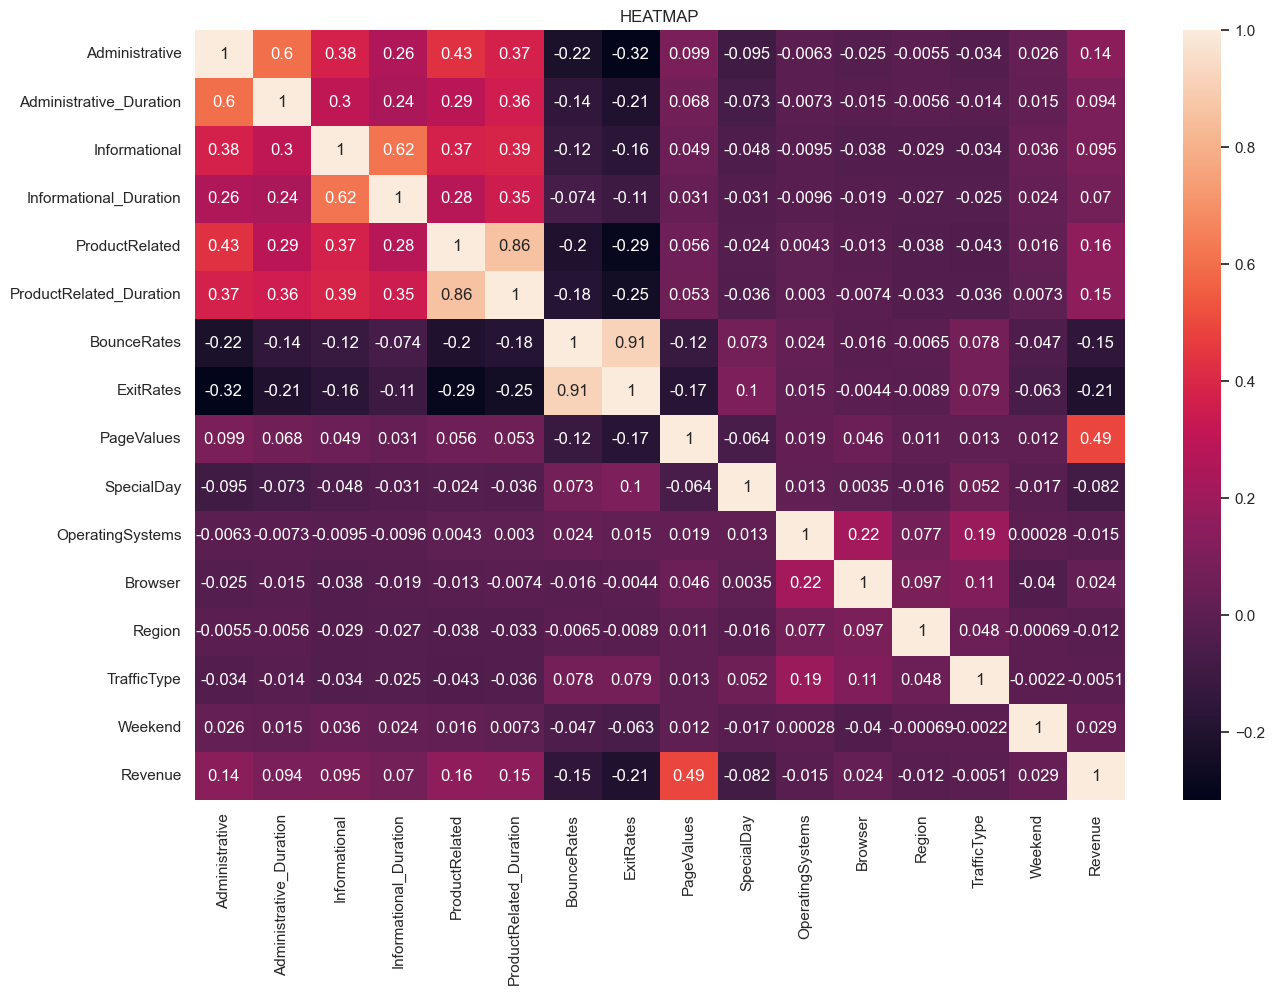

In [22]:
#1.heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('HEATMAP')
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


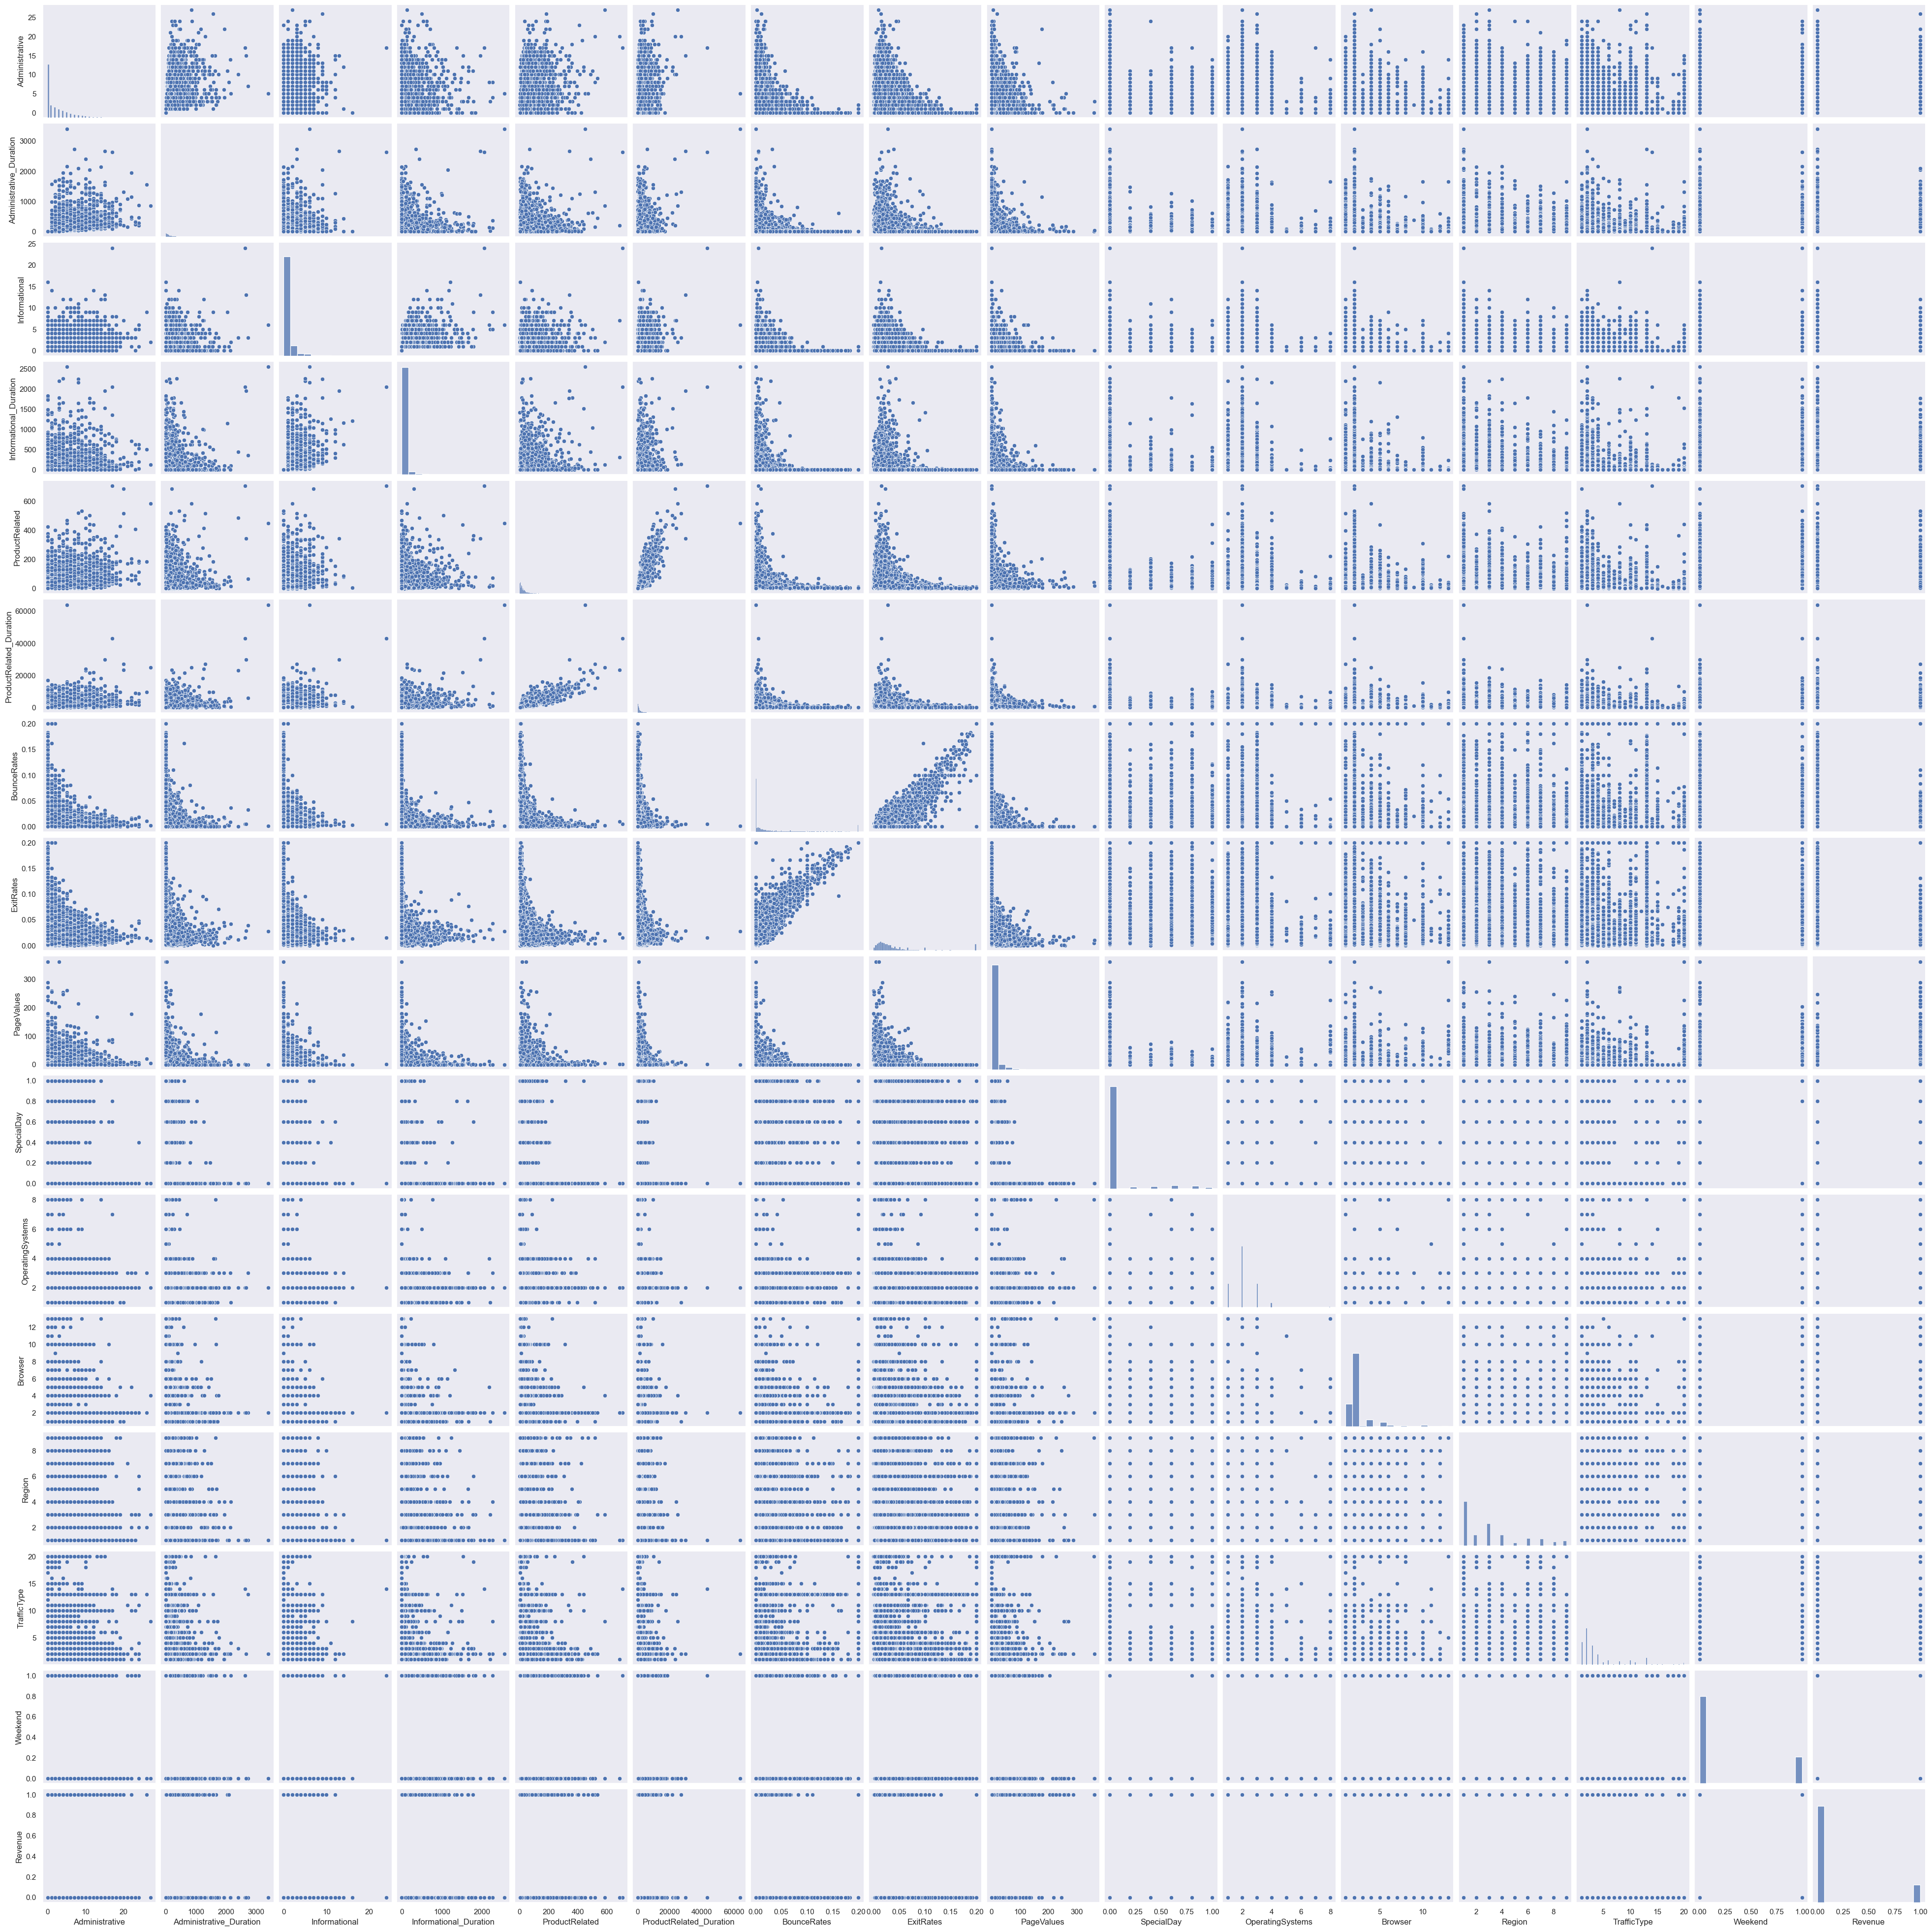

In [19]:
sns.pairplot(df)

#  Descriptive Statistics

In [23]:
df1 = df.drop(columns=['Month','VisitorType','Weekend','Revenue'])
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4


In [24]:
#We'll take only the numerical columns for the descriptive analysis for some functions so we'll create a new dataframe named df1 containg only numerical columns
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [25]:
df1.mode()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.0,0.0,0.2,0.0,0.0,2,2,1,2


In [26]:
df.max()

Administrative                            27
Administrative_Duration              3398.75
Informational                             24
Informational_Duration              2549.375
ProductRelated                           705
ProductRelated_Duration          63973.52223
BounceRates                              0.2
ExitRates                                0.2
PageValues                        361.763742
SpecialDay                               1.0
Month                                    Sep
OperatingSystems                           8
Browser                                   13
Region                                     9
TrafficType                               20
VisitorType                Returning_Visitor
Weekend                                 True
Revenue                                 True
dtype: object

In [27]:
df.min()

Administrative                       0
Administrative_Duration            0.0
Informational                        0
Informational_Duration             0.0
ProductRelated                       0
ProductRelated_Duration            0.0
BounceRates                        0.0
ExitRates                          0.0
PageValues                         0.0
SpecialDay                         0.0
Month                              Aug
OperatingSystems                     1
Browser                              1
Region                               1
TrafficType                          1
VisitorType                New_Visitor
Weekend                          False
Revenue                          False
dtype: object

In [28]:
df.var()

C:\Users\vish\AppData\Local\Temp\ipykernel_17216\1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


Administrative             1.103425e+01
Administrative_Duration    3.125085e+04
Informational              1.613297e+00
Informational_Duration     1.981036e+04
ProductRelated             1.978070e+03
ProductRelated_Duration    3.662130e+06
BounceRates                2.351117e-03
ExitRates                  2.361624e-03
PageValues                 3.447868e+02
SpecialDay                 3.956808e-02
OperatingSystems           8.305129e-01
Browser                    2.949039e+00
Region                     5.767640e+00
TrafficType                1.620199e+01
Weekend                    1.785135e-01
Revenue                    1.308093e-01
dtype: float64

In [29]:
df.std()

C:\Users\vish\AppData\Local\Temp\ipykernel_17216\3390915376.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


Administrative                3.321784
Administrative_Duration     176.779107
Informational                 1.270156
Informational_Duration      140.749294
ProductRelated               44.475503
ProductRelated_Duration    1913.669288
BounceRates                   0.048488
ExitRates                     0.048597
PageValues                   18.568437
SpecialDay                    0.198917
OperatingSystems              0.911325
Browser                       1.717277
Region                        2.401591
TrafficType                   4.025169
Weekend                       0.422509
Revenue                       0.361676
dtype: float64

In [30]:
quantile = df1.quantile(q=[0.25,0.50,0.75])
quantile

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0.25,0.0,0.00000,0.0,0.0,7.0,184.137500,0.000000,0.014286,0.0,0.0,2.0,2.0,1.0,2.0
0.50,1.0,7.50000,0.0,0.0,18.0,598.936905,0.003112,0.025156,0.0,0.0,2.0,2.0,3.0,2.0
0.75,4.0,93.25625,0.0,0.0,38.0,1464.157214,0.016813,0.050000,0.0,0.0,3.0,2.0,4.0,4.0


In [31]:
IQR = quantile.iloc[1]-quantile.iloc[0]
IQR

Administrative               1.000000
Administrative_Duration      7.500000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              11.000000
ProductRelated_Duration    414.799405
BounceRates                  0.003112
ExitRates                    0.010871
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             0.000000
Browser                      0.000000
Region                       2.000000
TrafficType                  0.000000
dtype: float64

In [32]:
upper_extreme = quantile.iloc[1]+(1.5*IQR)
upper_extreme

Administrative                2.500000
Administrative_Duration      18.750000
Informational                 0.000000
Informational_Duration        0.000000
ProductRelated               34.500000
ProductRelated_Duration    1221.136012
BounceRates                   0.007781
ExitRates                     0.041462
PageValues                    0.000000
SpecialDay                    0.000000
OperatingSystems              2.000000
Browser                       2.000000
Region                        6.000000
TrafficType                   2.000000
dtype: float64

In [33]:
lower_extreme = quantile.iloc[0]-(1.5*IQR)
lower_extreme

Administrative              -1.500000
Administrative_Duration    -11.250000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              -9.500000
ProductRelated_Duration   -438.061607
BounceRates                 -0.004669
ExitRates                   -0.002020
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             2.000000
Browser                      2.000000
Region                      -2.000000
TrafficType                  2.000000
dtype: float64

In [34]:
df.skew()

C:\Users\vish\AppData\Local\Temp\ipykernel_17216\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

In [35]:
df.kurt()

C:\Users\vish\AppData\Local\Temp\ipykernel_17216\1257127604.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


Administrative               4.701146
Administrative_Duration     50.556739
Informational               26.932266
Informational_Duration      76.316853
ProductRelated              31.211707
ProductRelated_Duration    137.174164
BounceRates                  7.723159
ExitRates                    4.017035
PageValues                  65.635694
SpecialDay                   9.913659
OperatingSystems            10.456843
Browser                     12.746733
Region                      -0.148680
TrafficType                  3.479711
Weekend                     -0.397404
Revenue                      1.646493
dtype: float64

In [36]:
df.corr()

C:\Users\vish\AppData\Local\Temp\ipykernel_17216\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [37]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [38]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

# Outliers

<Axes: >

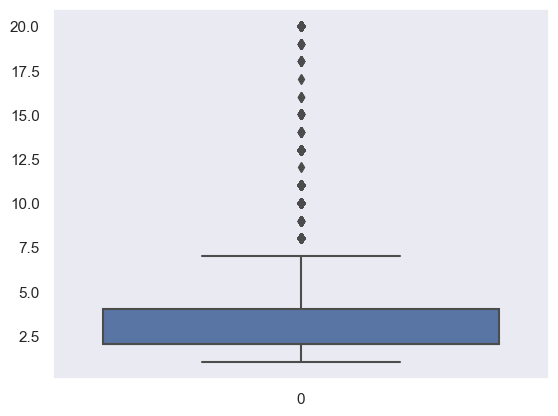

In [39]:
sns.boxplot(df['TrafficType'])

Text(0.5, 1.0, 'BOXPLOT')

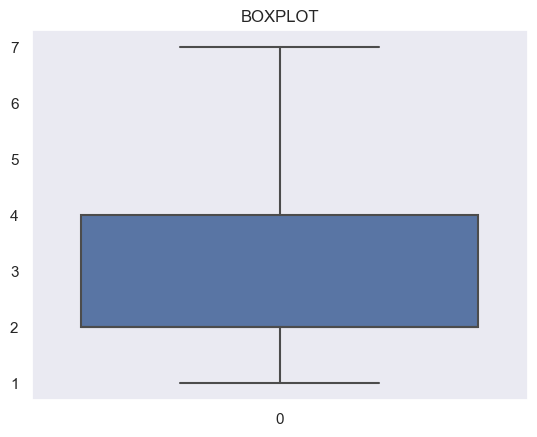

In [40]:
Q1 = df['TrafficType'].quantile(0.25)
Q3 = df['TrafficType'].quantile(0.75)
IQR = Q3 - Q1
l_e = Q1 -(1.5*IQR)
u_e = Q3 + (1.5*IQR)
df['TrafficType']=np.where(df['TrafficType']>u_e,u_e,np.where(df['TrafficType']<l_e,l_e,df['TrafficType']))
sns.boxplot(df['TrafficType'])
plt.title('BOXPLOT')

<Axes: >

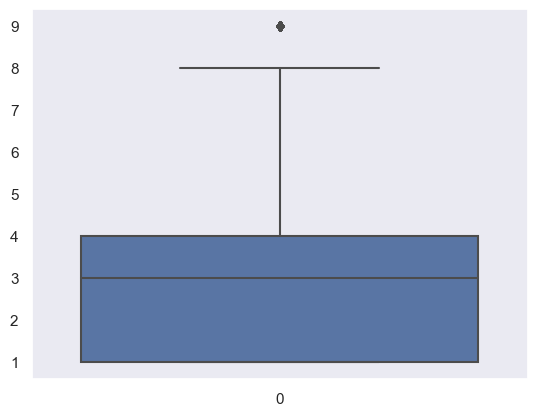

In [41]:
sns.boxplot(df['Region'])

Text(0.5, 1.0, 'BOXPLOT')

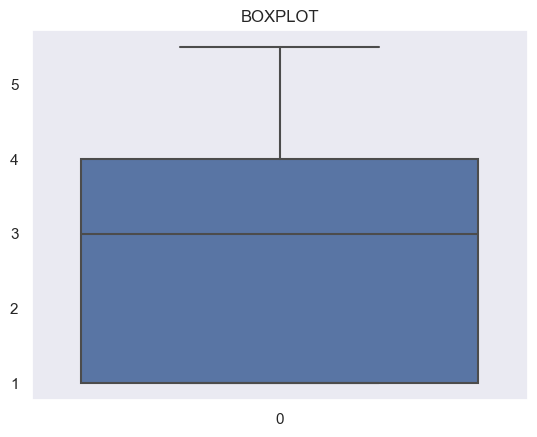

In [42]:
Q1 = df['Region'].quantile(0.25)
Q3 = df['Region'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['Region'] = np.where(df['Region']>u_e,u_e,np.where(df['Region']<l_e,l_e,df['Region']))
sns.boxplot(df['Region'])
plt.title('BOXPLOT')

<Axes: >

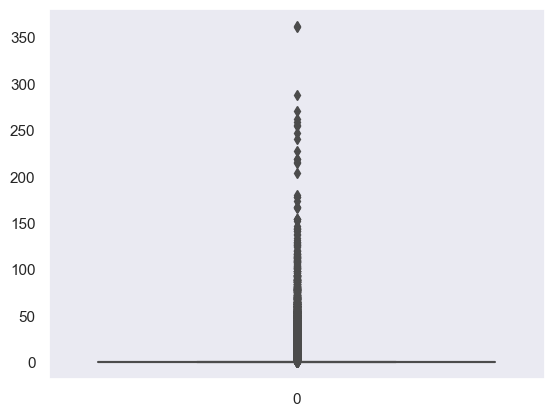

In [43]:
sns.boxplot(df['PageValues'])

Text(0.5, 1.0, 'BOXPLOT')

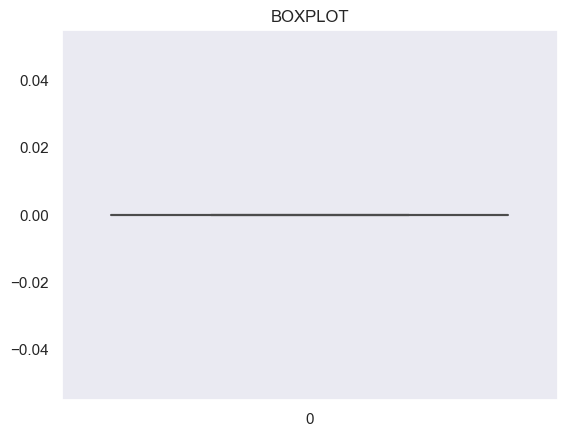

In [44]:
Q1 = df['PageValues'].quantile(0.25)
Q3 = df['PageValues'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['PageValues'] = np.where(df['PageValues']>u_e,u_e,np.where(df['PageValues']<l_e,l_e,df['PageValues']))
sns.boxplot(df['PageValues'])
plt.title('BOXPLOT')

<Axes: >

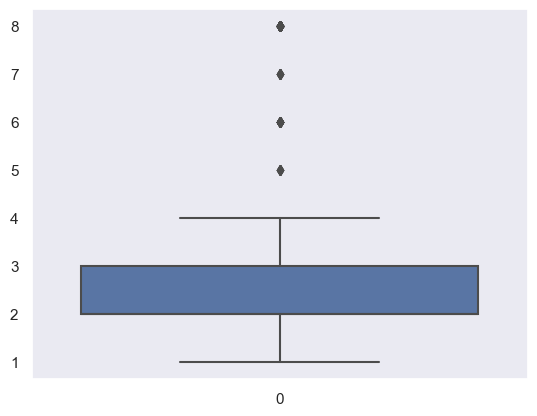

In [45]:
sns.boxplot(df['OperatingSystems'])

Text(0.5, 1.0, 'BOXPLOT')

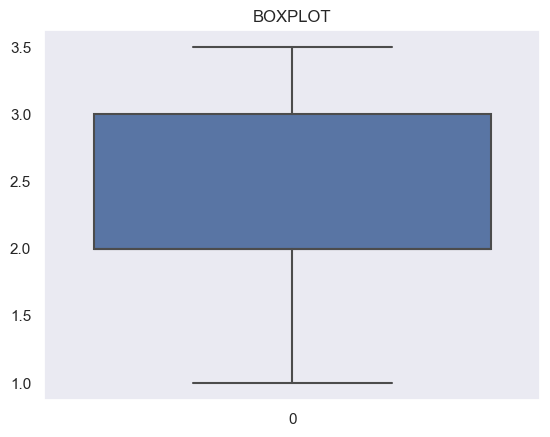

In [46]:
Q1 = df['OperatingSystems'].quantile(0.25)
Q3 = df['OperatingSystems'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['OperatingSystems'] = np.where(df['OperatingSystems']>u_e,u_e,np.where(df['OperatingSystems']<l_e,l_e,df['OperatingSystems']))
sns.boxplot(df['OperatingSystems'])
plt.title('BOXPLOT')

<Axes: >

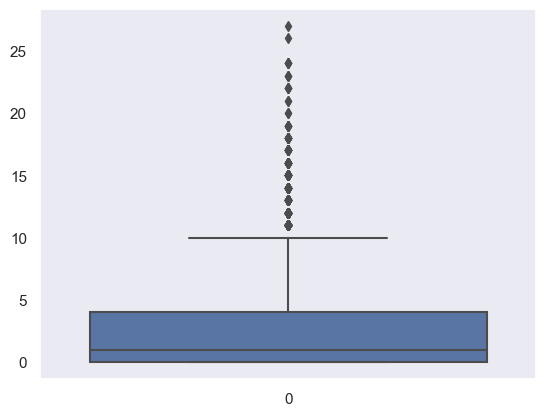

In [47]:
sns.boxplot(df['Administrative'])

Text(0.5, 1.0, 'BOXPLOT')

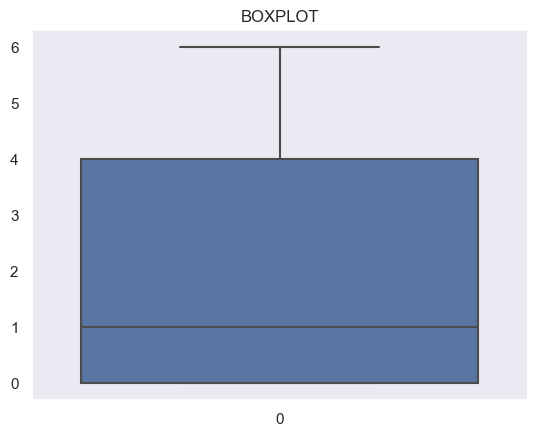

In [48]:
Q1 = df['Administrative'].quantile(0.25)
Q3 = df['Administrative'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['Administrative'] = np.where(df['Administrative']>u_e,u_e,np.where(df['Administrative']<l_e,l_e,df['Administrative']))
sns.boxplot(df['Administrative'])
plt.title('BOXPLOT')

<Axes: >

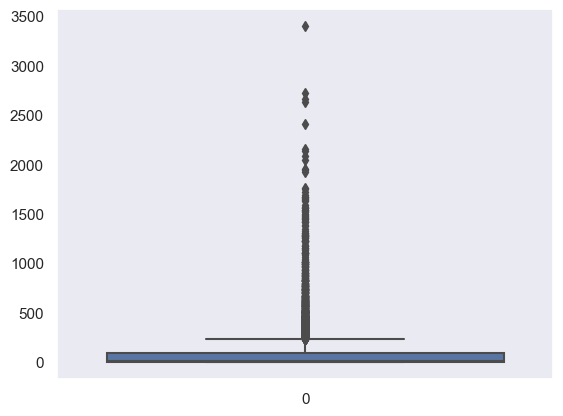

In [49]:
sns.boxplot(df['Administrative_Duration'])

Text(0.5, 1.0, 'BOXPLOT')

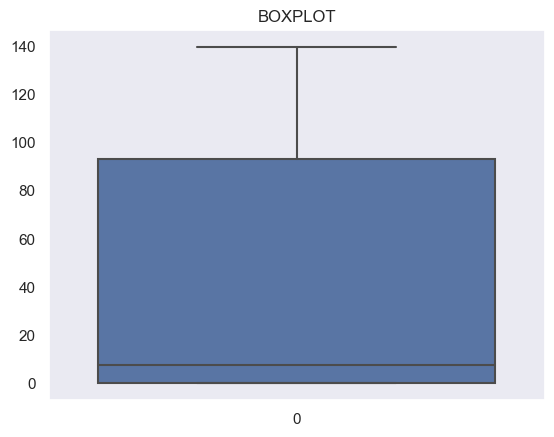

In [50]:
Q1 = df['Administrative_Duration'].quantile(0.25)
Q3 = df['Administrative_Duration'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['Administrative_Duration'] = np.where(df['Administrative_Duration']>u_e,u_e,np.where(df['Administrative_Duration']<l_e,l_e,df['Administrative_Duration']))
sns.boxplot(df['Administrative_Duration'])
plt.title('BOXPLOT')

<Axes: >

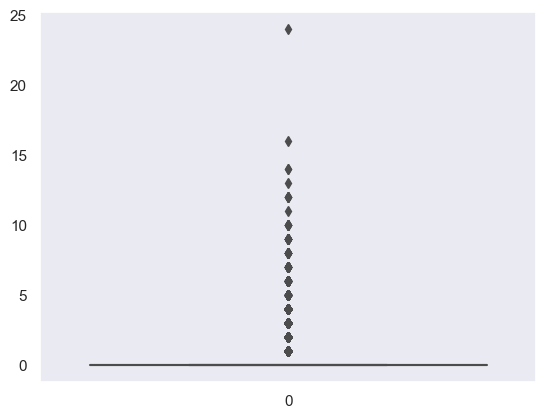

In [51]:
sns.boxplot(df['Informational'])

Text(0.5, 1.0, 'BOXPLOT')

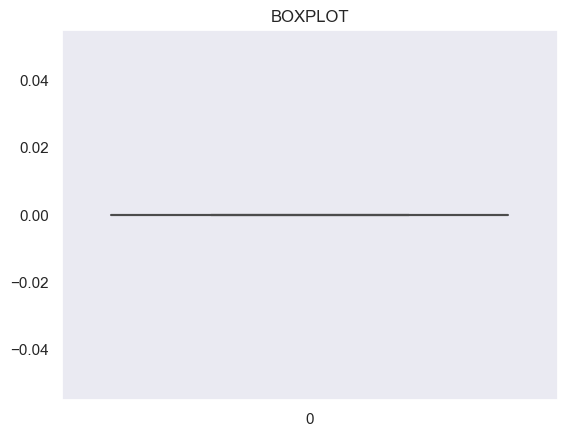

In [52]:
Q1 = df['Informational'].quantile(0.25)
Q3 = df['Informational'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['Informational'] = np.where(df['Informational']>u_e,u_e,np.where(df['Informational']<l_e,l_e,df['Informational']))
sns.boxplot(df['Informational'])
plt.title('BOXPLOT')

<Axes: >

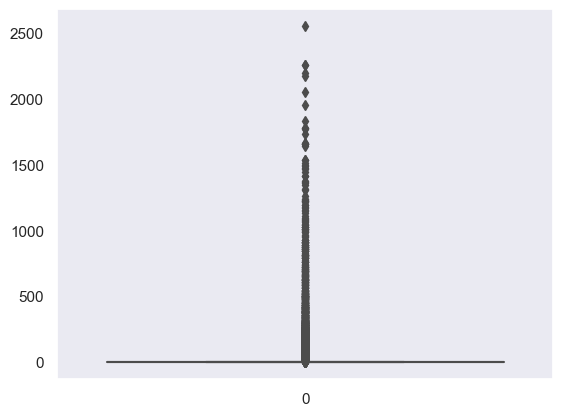

In [53]:
sns.boxplot(df['Informational_Duration'])

Text(0.5, 1.0, 'BOXPLOT')

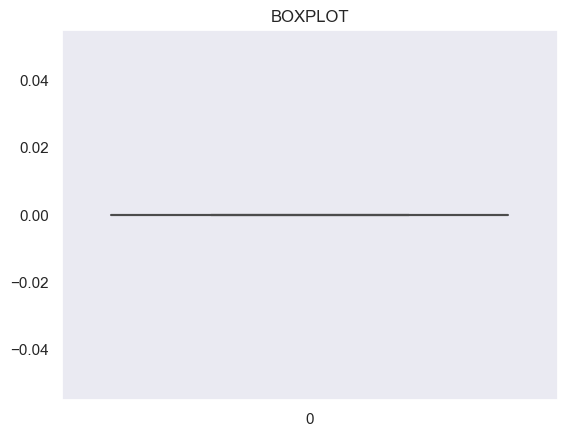

In [54]:
Q1 = df['Informational_Duration'].quantile(0.25)
Q3 = df['Informational_Duration'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['Informational_Duration'] = np.where(df['Informational_Duration']>u_e,u_e,np.where(df['Informational_Duration']<l_e,l_e,df['Informational_Duration']))
sns.boxplot(df['Informational_Duration'])
plt.title('BOXPLOT')

<Axes: >

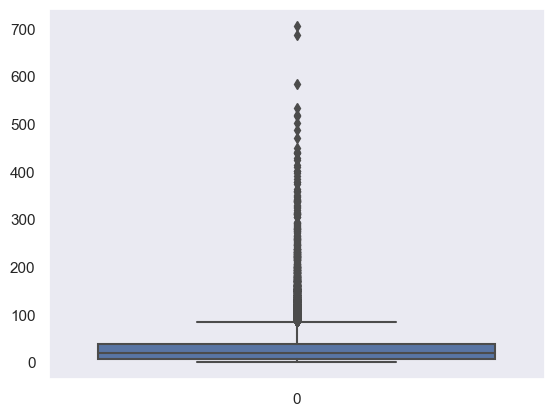

In [55]:
sns.boxplot(df['ProductRelated'])

Text(0.5, 1.0, 'BOXPLOT')

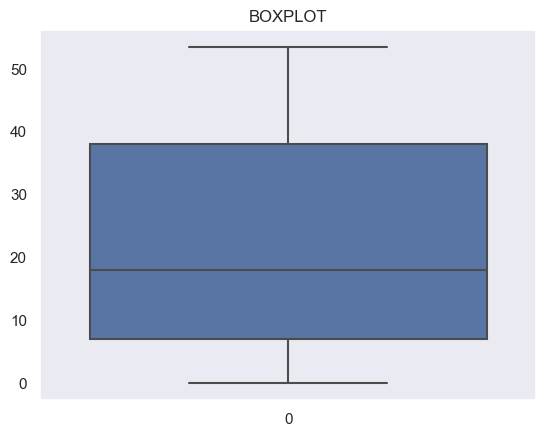

In [56]:
Q1 = df['ProductRelated'].quantile(0.25)
Q3 = df['ProductRelated'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['ProductRelated'] = np.where(df['ProductRelated']>u_e,u_e,np.where(df['ProductRelated']<l_e,l_e,df['ProductRelated']))
sns.boxplot(df['ProductRelated'])
plt.title('BOXPLOT')

<Axes: >

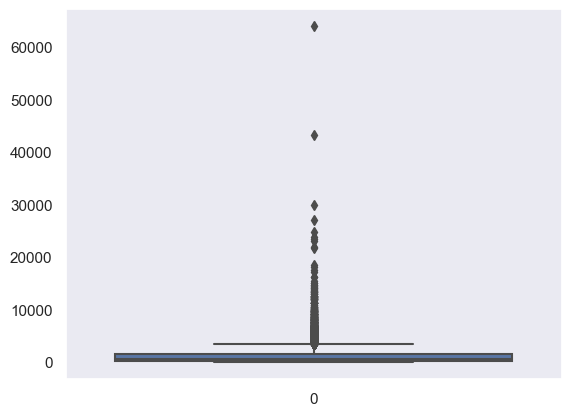

In [57]:
sns.boxplot(df['ProductRelated_Duration'])

Text(0.5, 1.0, 'BOXPLOT')

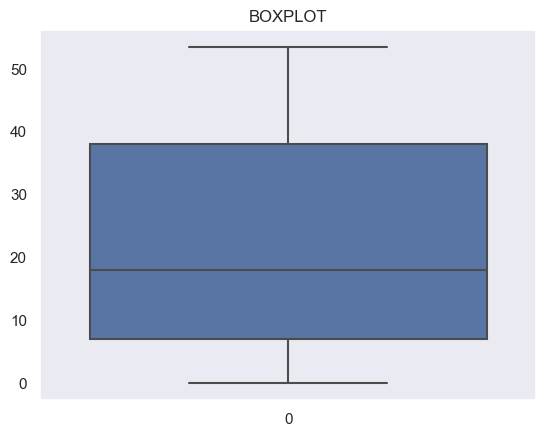

In [58]:
Q1 = df['ProductRelated'].quantile(0.25)
Q3 = df['ProductRelated'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['ProductRelated'] = np.where(df['ProductRelated']>u_e,u_e,np.where(df['ProductRelated']<l_e,l_e,df['ProductRelated']))
sns.boxplot(df['ProductRelated'])
plt.title('BOXPLOT')

<Axes: >

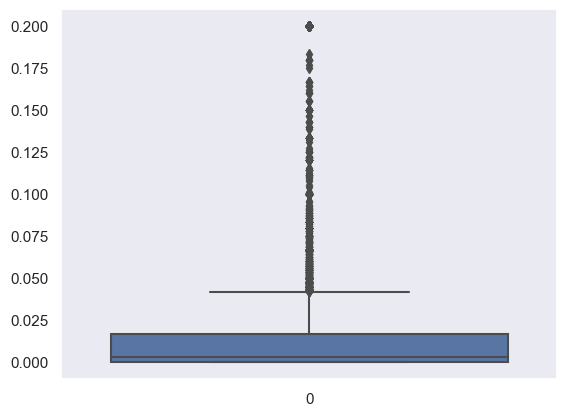

In [59]:
sns.boxplot(df['BounceRates'])

Text(0.5, 1.0, 'BOXPLOT')

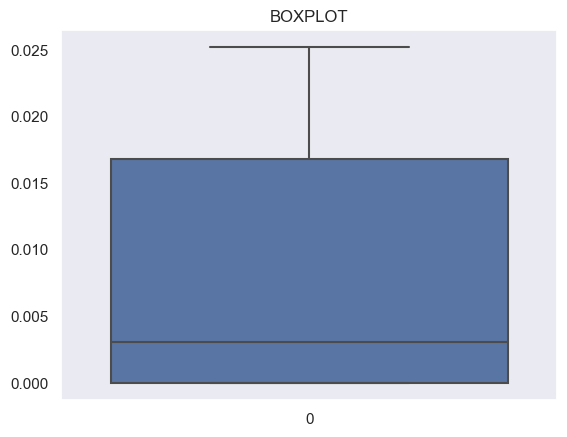

In [60]:
Q1 = df['BounceRates'].quantile(0.25)
Q3 = df['BounceRates'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['BounceRates'] = np.where(df['BounceRates']>u_e,u_e,np.where(df['BounceRates']<l_e,l_e,df['BounceRates']))
sns.boxplot(df['BounceRates'])
plt.title('BOXPLOT')

<Axes: >

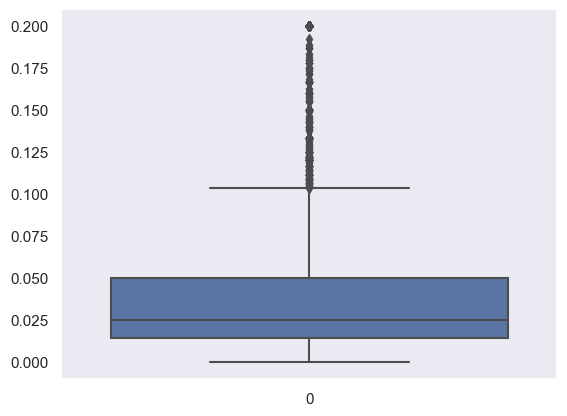

In [61]:
sns.boxplot(df['ExitRates'])

Text(0.5, 1.0, 'BOXPLOT')

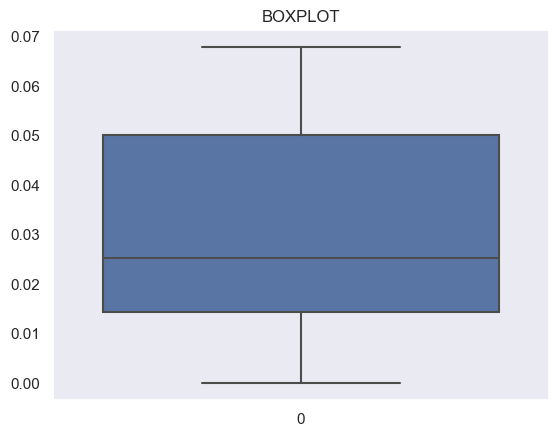

In [62]:
Q1 = df['ExitRates'].quantile(0.25)
Q3 = df['ExitRates'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['ExitRates'] = np.where(df['ExitRates']>u_e,u_e,np.where(df['ExitRates']<l_e,l_e,df['ExitRates']))
sns.boxplot(df['ExitRates'])
plt.title('BOXPLOT')

<Axes: >

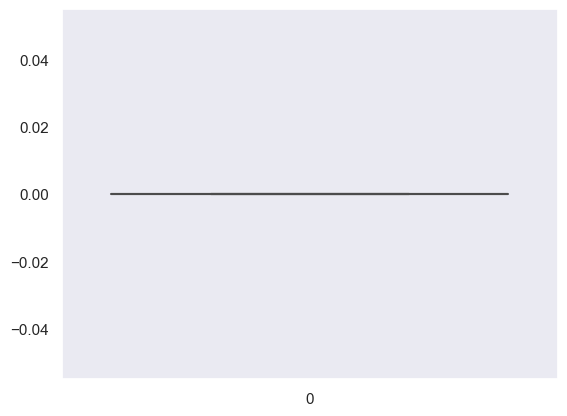

In [63]:
sns.boxplot(df['PageValues'])

Text(0.5, 1.0, 'BOXPLOT')

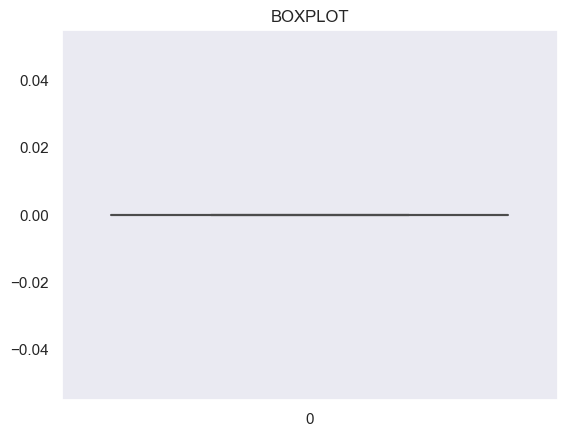

In [64]:
Q1 = df['PageValues'].quantile(0.25)
Q3 = df['PageValues'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['PageValues'] = np.where(df['PageValues']>u_e,u_e,np.where(df['PageValues']<l_e,l_e,df['PageValues']))
sns.boxplot(df['PageValues'])
plt.title('BOXPLOT')

<Axes: >

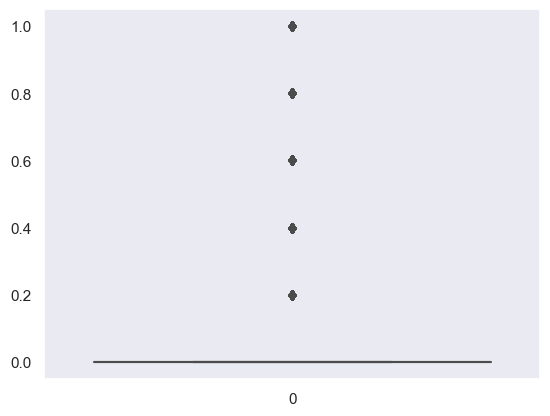

In [65]:
sns.boxplot(df['SpecialDay'])

Text(0.5, 1.0, 'BOXPLOT')

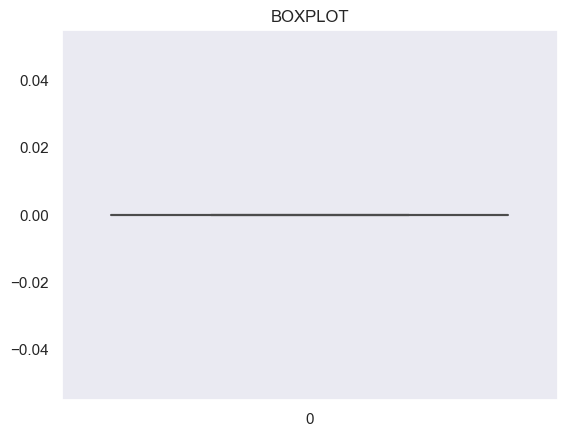

In [66]:
Q1 = df['SpecialDay'].quantile(0.25)
Q3 = df['SpecialDay'].quantile(0.75)
IQR = Q3-Q1
l_e = Q1 - (1.5*IQR)
u_e = Q1 + (1.5*IQR)
df['SpecialDay'] = np.where(df['SpecialDay']>u_e,u_e,np.where(df['SpecialDay']<l_e,l_e,df['SpecialDay']))
sns.boxplot(df['SpecialDay'])
plt.title('BOXPLOT')

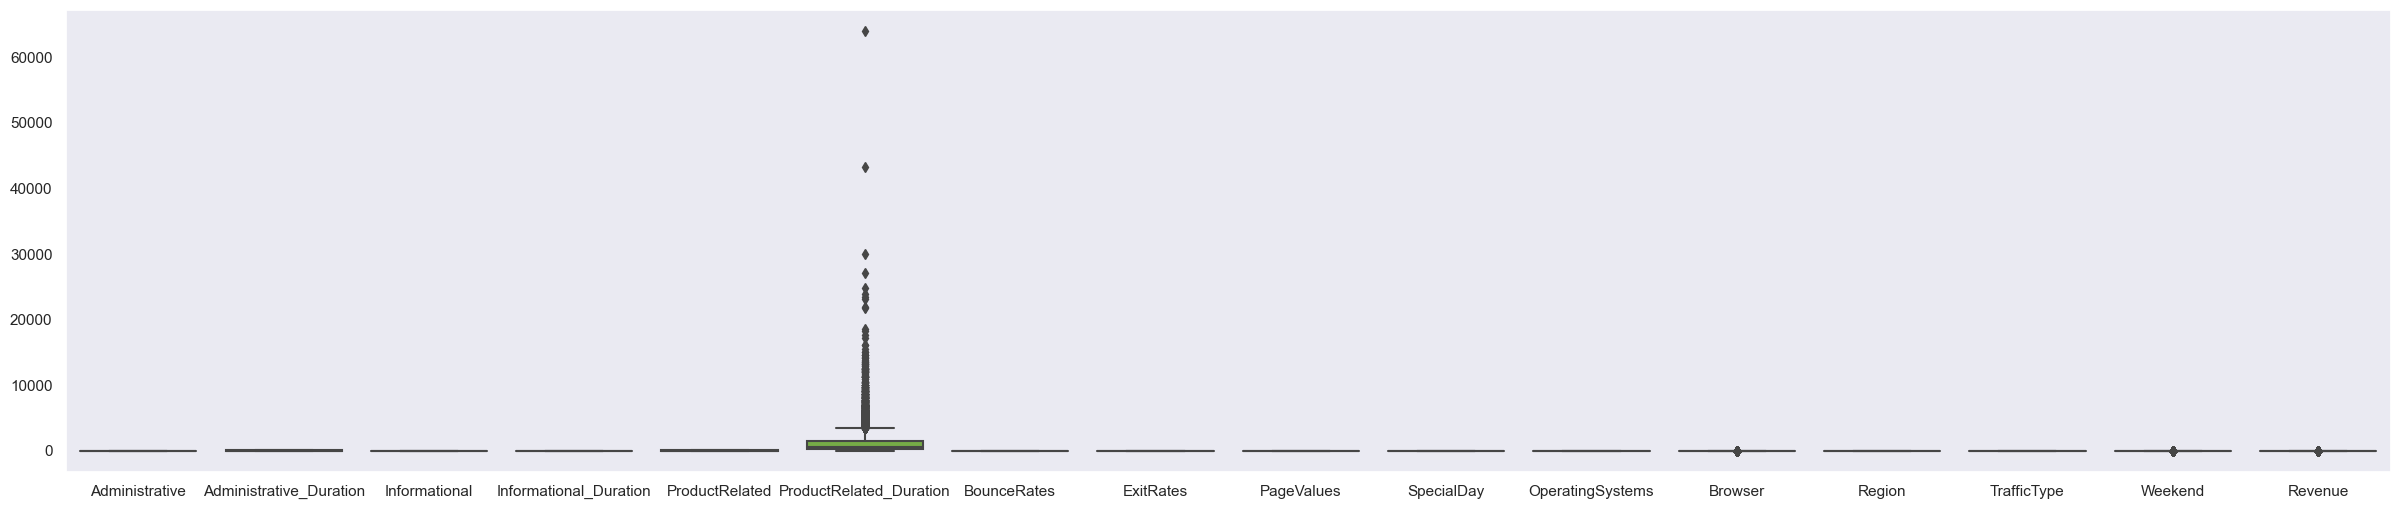

In [67]:
plt.figure(figsize=(30, 6))  # Set the size of the figure

# Assuming 'df' is your DataFrame containing the data
sns.boxplot(data=df)

plt.show() 

# Encoding

In [68]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.025219,0.067857,0.0,0.0,Feb,1.0,1,1.0,1.0,Returning_Visitor,False,False
1,0.0,0.000000,0.0,0.0,2.0,64.000000,0.000000,0.067857,0.0,0.0,Feb,2.0,2,1.0,2.0,Returning_Visitor,False,False
2,0.0,0.000000,0.0,0.0,1.0,0.000000,0.025219,0.067857,0.0,0.0,Feb,3.5,1,5.5,3.0,Returning_Visitor,False,False
3,0.0,0.000000,0.0,0.0,2.0,2.666667,0.025219,0.067857,0.0,0.0,Feb,3.0,2,2.0,4.0,Returning_Visitor,False,False
4,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3.0,3,1.0,4.0,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,139.884375,0.0,0.0,53.0,1783.791667,0.007143,0.029031,0.0,0.0,Dec,3.5,6,1.0,1.0,Returning_Visitor,True,False
12326,0.0,0.000000,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.0,0.0,Nov,3.0,2,1.0,7.0,Returning_Visitor,True,False
12327,0.0,0.000000,0.0,0.0,6.0,184.250000,0.025219,0.067857,0.0,0.0,Nov,3.0,2,1.0,7.0,Returning_Visitor,True,False
12328,4.0,75.000000,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.0,0.0,Nov,2.0,2,3.0,7.0,Returning_Visitor,False,False


In [69]:

month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

df['month_encoded']=df['Month'].map(month_mapping)



In [70]:

df= df.dropna(subset=['month_encoded'])

df=df.drop(['Month'], axis=1)

df


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,month_encoded
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.025219,0.067857,0.0,0.0,1.0,1,1.0,1.0,Returning_Visitor,False,False,2.0
1,0.0,0.000000,0.0,0.0,2.0,64.000000,0.000000,0.067857,0.0,0.0,2.0,2,1.0,2.0,Returning_Visitor,False,False,2.0
2,0.0,0.000000,0.0,0.0,1.0,0.000000,0.025219,0.067857,0.0,0.0,3.5,1,5.5,3.0,Returning_Visitor,False,False,2.0
3,0.0,0.000000,0.0,0.0,2.0,2.666667,0.025219,0.067857,0.0,0.0,3.0,2,2.0,4.0,Returning_Visitor,False,False,2.0
4,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,3.0,3,1.0,4.0,Returning_Visitor,True,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,139.884375,0.0,0.0,53.0,1783.791667,0.007143,0.029031,0.0,0.0,3.5,6,1.0,1.0,Returning_Visitor,True,False,12.0
12326,0.0,0.000000,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.0,0.0,3.0,2,1.0,7.0,Returning_Visitor,True,False,11.0
12327,0.0,0.000000,0.0,0.0,6.0,184.250000,0.025219,0.067857,0.0,0.0,3.0,2,1.0,7.0,Returning_Visitor,True,False,11.0
12328,4.0,75.000000,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.0,0.0,2.0,2,3.0,7.0,Returning_Visitor,False,False,11.0


In [71]:

VisitorType_mapping={
    'Returning_Visitor':0,
    'New_Visitor':1,
    'Other':2
}

df['VisitorType_encoded']=df['VisitorType'].map(VisitorType_mapping)

In [72]:
df=df.drop(['VisitorType'], axis=1)
df.isnull().any()


Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
Weekend                    False
Revenue                    False
month_encoded              False
VisitorType_encoded        False
dtype: bool

In [73]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,month_encoded,VisitorType_encoded
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.025219,0.067857,0.0,0.0,1.0,1,1.0,1.0,False,False,2.0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.067857,0.0,0.0,2.0,2,1.0,2.0,False,False,2.0,0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.025219,0.067857,0.0,0.0,3.5,1,5.5,3.0,False,False,2.0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.025219,0.067857,0.0,0.0,3.0,2,2.0,4.0,False,False,2.0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,3.0,3,1.0,4.0,True,False,2.0,0


# Train , Test and Split

In [74]:
y = df['Revenue']
X = df.drop(['Revenue'], axis=1)


In [75]:
#training and testing
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

# Feature Scaling

In [76]:
sc_X = StandardScaler()

Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)


# Model Buiding

# Random Forest

In [77]:
rfm = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=True) #default parameters
rfm.fit(X_train,y_train)
rfm_pred = rfm.predict(X_val)

print('Random Forest initial Performance:')
print('----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, rfm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, rfm_pred))
print('Precision       : ', metrics.precision_score(y_val, rfm_pred))
print('Recall          : ', metrics.recall_score(y_val, rfm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_pred))

D:\APPS\Conda\New folder\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest initial Performance:
----------------------------------
Accuracy        :  0.832779623477298
F1 Score        :  0.14689265536723164
Precision       :  0.5306122448979592
Recall          :  0.08524590163934426
Confusion Matrix:
  [[1478   23]
 [ 279   26]]


# Navie bayes

In [78]:
nbm = GaussianNB()
nbm.fit(X_train,y_train)
nbm_pred = nbm.predict(X_val)

print('Gaussian Naive Bayes Performance:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, nbm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, nbm_pred))
print('Precision       : ', metrics.precision_score(y_val, nbm_pred))
print('Recall          : ', metrics.recall_score(y_val, nbm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, nbm_pred))

Gaussian Naive Bayes Performance:
---------------------------------
Accuracy        :  0.7763012181616833
F1 Score        :  0.25735294117647056
Precision       :  0.2928870292887029
Recall          :  0.22950819672131148
Confusion Matrix:
  [[1332  169]
 [ 235   70]]


# SVM

In [79]:
# Create an SVM classifier
clf = SVC()

# Train the SVM classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8411732152739347


# Logistic Regression

In [80]:
lrm = LogisticRegression(C=1.0,solver='lbfgs',) #default parameters
lrm.fit(X_train,y_train)
lrm_pred = lrm.predict(X_val)


print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_pred))

Accuracy        :  0.832779623477298
F1 Score        :  0.038216560509554146
Precision       :  0.6666666666666666
Recall          :  0.019672131147540985
Confusion Matrix:
  [[1498    3]
 [ 299    6]]


D:\APPS\Conda\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN

In [81]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',leaf_size=30,p=2) #default values
knn.fit(Xsc_train,y_train)
knn_pred = knn.predict(Xsc_val)

print('K-Nearest Neighbor Initial Performance:')
print('---------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, knn_pred))
print('F1 Score        : ', metrics.f1_score(y_val, knn_pred))
print('Precision       : ', metrics.precision_score(y_val, knn_pred))
print('Recall          : ', metrics.recall_score(y_val, knn_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_pred))

K-Nearest Neighbor Initial Performance:
---------------------------------------
Accuracy        :  0.8145071982281284
F1 Score        :  0.19664268585131897
Precision       :  0.36607142857142855
Recall          :  0.13442622950819672
Confusion Matrix:
  [[1430   71]
 [ 264   41]]


# Accuracy of each Model

### Randomforest classifier has the highest accuracy of all

In [82]:
#nb=83,knn=81,logreg=83,svm=84,randomforest=86

# Dumping the model using pickle

In [83]:
import pickle
pickle.dump(rfm,open("rfmModelfin2.pkl","wb"))  

In [84]:
m=pickle.load(open("rfmModelfin2.pkl","rb"))

#testing the model with a sample input
try1=df.iloc[5]
try1=try1.drop(['Revenue'])
try1

Administrative                    0.0
Administrative_Duration           0.0
Informational                     0.0
Informational_Duration            0.0
ProductRelated                   19.0
ProductRelated_Duration    154.216667
BounceRates                  0.015789
ExitRates                    0.024561
PageValues                        0.0
SpecialDay                        0.0
OperatingSystems                  2.0
Browser                             2
Region                            1.0
TrafficType                       3.0
Weekend                         False
month_encoded                     2.0
VisitorType_encoded                 0
Name: 5, dtype: object

In [85]:
try1=pd.DataFrame(try1.T)

## Testing the model using a sample input

In [86]:
m.predict(try1.T)

array([False])